# 608 FINAL PROJECT by DIEUDONNE OUEDRAOGO

##My Goal

My goal in this project is to used the new york city subway turnstile data to visualize entries in and exits in each station .I enrolled in data science course at udacity and one of a requirement for a certificate is to work on the new york subway turnstile data.
the data I am working with can be found at 
https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv.

I initially thought to be working on current data for January 2015 data ,but due to issues on cleaning the data and time constraint ,I will tackle that later 
I will break my project into 2 parts :
A part where I use R to build shiny apps for visualizing different scenario: "rush hour entries or exits"....
A part where I will use python to graphs Entries and Exits
I also will mention that I am enrolled in udacity class "intoduction to data science "and this data above is provided,and students are required to build their final project on this data in order to pass the class.
As much as I would love to use the current data from the subway turnstile to build a more current inference,I run to many issues in cleaning the current data and adding the weather data into it.

Can we predict how many people will enter or exit a station at any given time ?
Can we know the most busyiest stations based on the data ?
Does weather(rain or no rain) has effect on the number of entries and exits?

Answering this question could help the Metro Transit Authority (MTA) in NYC save money and make the metro safer. More accurate predictions of how many people will visit certain stations could allow the MTA to better assign staff and predict rush periods that otherwise would be unexpected.


In [2]:
from __future__ import division

import datetime
import itertools
import operator

import brewer2mpl
import ggplot as gg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats
import statsmodels.api as sm

%matplotlib inline

In [3]:
#I Downloaded and save the csv file into my compouter! the file is turnstile_data_master_with_weather.csv
# lets read the 10 first lines

In [4]:
with open("turnstile_data_master_with_weather.csv") as f_in:
    for i in xrange(10):
        print f_in.readline().strip()

,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,35.0,30.23,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,35.0,30.23,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,35.0,30.23,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,35.0,30.23,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,35.0,30.23,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
5,R001,2011-05-01,21:00:00,21,REGULAR,3372.0,2122.0,30.31,42.0,35.0,30.23,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
6,R002,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,35.0,30.23,39.0,30.27,0.0,0.0,5.0,50.0,6

# I will use pandas which is very familiar to me as it is close to R

In [5]:
data = pd.read_csv("turnstile_data_master_with_weather.csv")
data.head(n=10)

Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  ENTRIESn_hourly  \
0           0  R001  2011-05-01  01:00:00     1  REGULAR                0   
1           1  R001  2011-05-01  05:00:00     5  REGULAR              217   
2           2  R001  2011-05-01  09:00:00     9  REGULAR              890   
3           3  R001  2011-05-01  13:00:00    13  REGULAR             2451   
4           4  R001  2011-05-01  17:00:00    17  REGULAR             4400   
5           5  R001  2011-05-01  21:00:00    21  REGULAR             3372   
6           6  R002  2011-05-01  01:00:00     1  REGULAR                0   
7           7  R002  2011-05-01  05:00:00     5  REGULAR               42   
8           8  R002  2011-05-01  09:00:00     9  REGULAR               50   
9           9  R002  2011-05-01  13:00:00    13  REGULAR              316   

   EXITSn_hourly  maxpressurei  maxdewpti   ...     meandewpti  meanpressurei  \
0              0         30.31         42   ...             39          30.27   
1            553         30.31         42   ...             39          30.27   
2           1262         30.31         42   ...             39          30.27   
3           3708         30.31         42   ...             39          30.27   
4           2501         30.31         42   ...             39          30.27   
5           2122         30.31         42   ...             39          30.27   
6              0         30.31         42   ...             39          30.27   
7             66         30.31         42   ...             39          30.27   
8            125         30.31         42   ...             39          30.27   
9            716         30.31         42   ...             39          30.27   

   fog  rain  meanwindspdi  mintempi  meantempi  maxtempi  precipi  thunder  
0    0     0             5        50         60        69        0        0  
1    0     0             5        50         60        69        0        0  
2    0     0             5        50         60        69        0        0  
3    0     0             5        50         60        69        0        0  
4    0     0             5        50         60        69        0        0  
5    0     0             5        50         60        69        0        0  
6    0     0             5        50         60        69        0        0  
7    0     0             5        50         60        69        0        0  
8    0     0             5        50         60        69        0        0  
9    0     0             5        50         60        69        0        0  

[10 rows x 22 columns]

In [6]:
data.describe()

Unnamed: 0           Hour  ENTRIESn_hourly  EXITSn_hourly  \
count  131951.000000  131951.000000    131951.000000  131951.000000   
mean    65975.000000      10.896158      1095.348478     886.890838   
std     38091.117022       6.892084      2337.015421    2008.604886   
min         0.000000       0.000000         0.000000       0.000000   
25%     32987.500000       5.000000        39.000000      32.000000   
50%     65975.000000      12.000000       279.000000     232.000000   
75%     98962.500000      17.000000      1109.000000     847.000000   
max    131950.000000      23.000000     51839.000000   45249.000000   

        maxpressurei      maxdewpti      mindewpti   minpressurei  \
count  131951.000000  131951.000000  131951.000000  131951.000000   
mean       30.031894      57.241302      48.259013      29.892714   
std         0.125689       8.770891      11.305312       0.146384   
min        29.740000      39.000000      22.000000      29.540000   
25%        29.960000      50.000000      38.000000      29.840000   
50%        30.030000      57.000000      51.000000      29.910000   
75%        30.100000      64.000000      55.000000      29.970000   
max        30.310000      70.000000      66.000000      30.230000   

          meandewpti  meanpressurei            fog           rain  \
count  131951.000000  131951.000000  131951.000000  131951.000000   
mean       52.703526      29.965077       0.167100       0.334245   
std         9.943590       0.130461       0.373066       0.471728   
min        31.000000      29.640000       0.000000       0.000000   
25%        45.000000      29.910000       0.000000       0.000000   
50%        54.000000      29.960000       0.000000       0.000000   
75%        60.000000      30.050000       0.000000       1.000000   
max        68.000000      30.270000       1.000000       1.000000   

        meanwindspdi       mintempi      meantempi       maxtempi  \
count  131951.000000  131951.000000  131951.000000  131951.000000   
mean        5.543065      56.169775      64.269729      71.769968   
std         1.982441       6.338875       6.568289       7.627218   
min         1.000000      46.000000      55.000000      58.000000   
25%         5.000000      52.000000      60.000000      65.000000   
50%         5.000000      54.000000      63.000000      71.000000   
75%         6.000000      60.000000      68.000000      78.000000   
max        12.000000      70.000000      78.000000      86.000000   

             precipi  thunder  
count  131951.000000   131951  
mean        0.172276        0  
std         0.429005        0  
min         0.000000        0  
25%         0.000000        0  
50%         0.000000        0  
75%         0.100000        0  
max         2.180000        0

In [7]:
len(data)

131951

For convenience I add a new column that combines the date and time columns. This will make our plotting just below a little easier:

In [8]:
data["DATETIMEn"] = pd.to_datetime(data["DATEn"] + " " + data["TIMEn"], format="%Y-%m-%d %H:%M:%S")

## Lets plot the number of entries and exits from the subway over time 

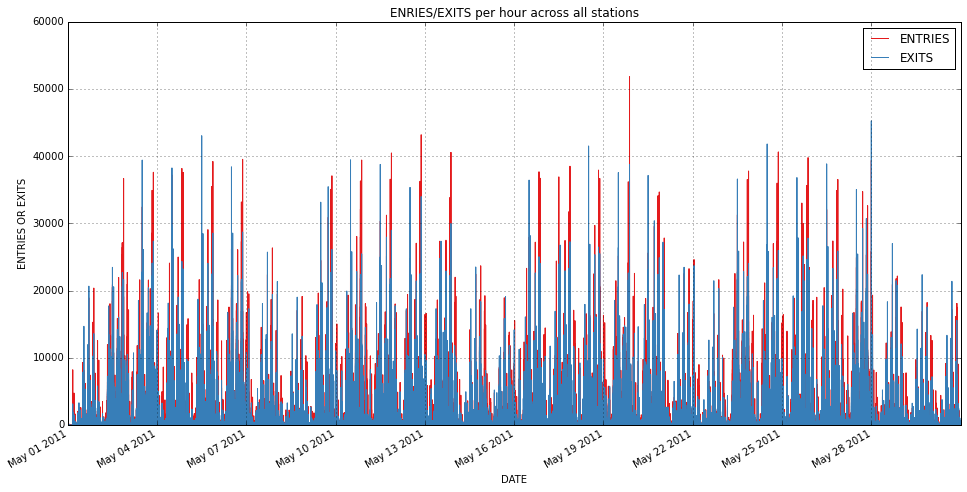

In [9]:
data2= data[["DATETIMEn", "ENTRIESn_hourly", "EXITSn_hourly"]] \
               .set_index("DATETIMEn") \
               .sort_index()
fig, ax = pylab.subplots(figsize=(16, 8))
set1 = brewer2mpl.get_map('Set1', 'qualitative', 9).mpl_colors
data2.plot(ax=ax, color=set1)
ax.set_title("ENRIES/EXITS per hour across all stations")
ax.legend(["ENTRIES", "EXITS"])
ax.set_ylabel("ENTRIES OR EXITS")
ax.set_xlabel("DATE")
pass

From this chart we can already tell that:

- some days are less busy than others, but it's difficult to tell which days in particular are less busy, and
- there seems to be several spikes per day in both entries and exits, but it's difficult to tell when these spikes occur.

Time to dig in a bit deeper. Firstly, let's see how the day of the week affects the number of entries/exits per hour:

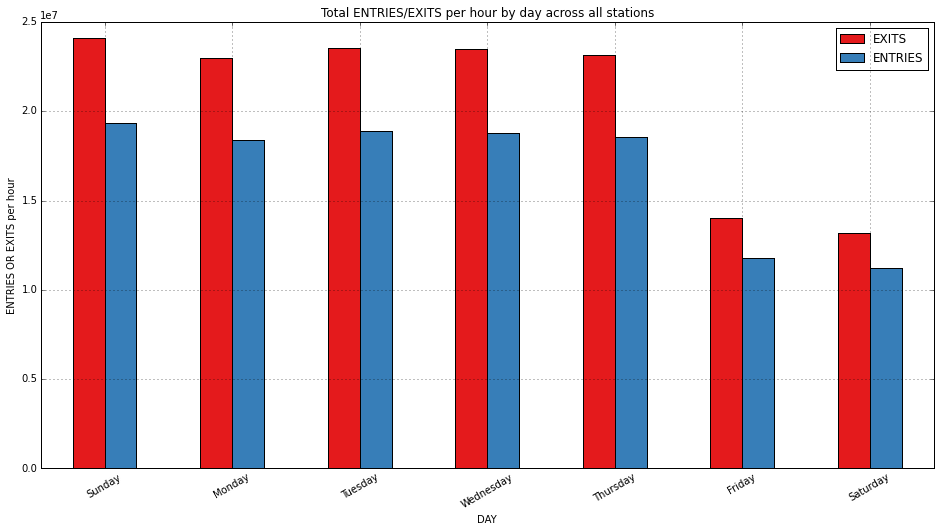

In [10]:
data_per_day = data2
data_per_day["day"] = data_per_day.index.weekday
data_per_day = data_per_day[["day", "ENTRIESn_hourly", "EXITSn_hourly"]] \
            .groupby("day") \
            .agg(sum)

fig, ax = plt.subplots(figsize=(16, 8))
set1 = brewer2mpl.get_map('Set1', 'qualitative', 9).mpl_colors
data_per_day.plot(ax=ax, kind="bar", color=set1)
ax.set_title("Total ENTRIES/EXITS per hour by day across all stations")
ax.legend(["EXITS", "ENTRIES"])
ax.set_ylabel("ENTRIES OR EXITS per hour")
ax.set_xlabel("DAY")
ax.set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
                   rotation=30)
pass

FRIDAYS AND SATURDAY ARE  the least busy days.

Secondly, we want to plot the total hourly entries and exits per hour grouped by hour to see which hours are more busy than others. Our data however won't make this easy, because it's only sampled once every four hours (1AM, 5AM, 9AM, ...). We need to resample our data and guess what the entries/exits for e.g. 2AM, 3AM, etc would be, and we guess these values by "drawing straight lines" between known values.

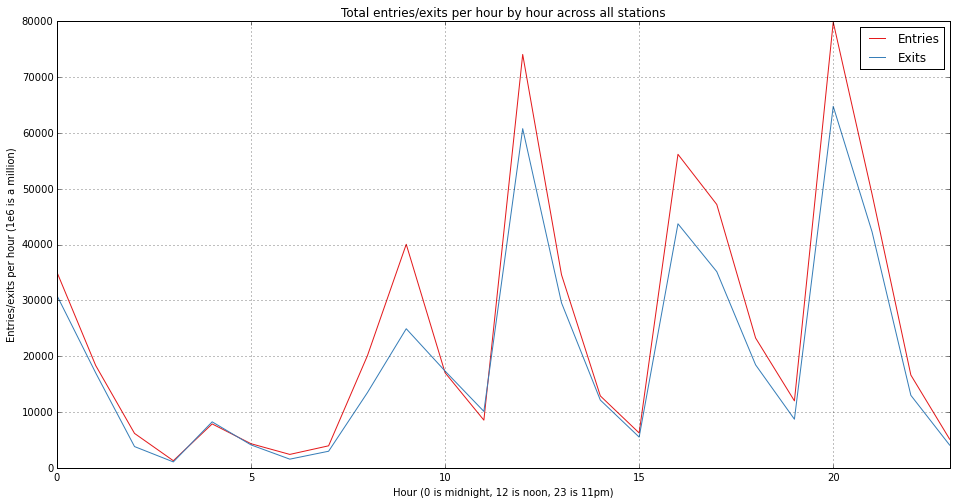

In [11]:
data_per_hour = data2.resample("H")
data_per_hour["hour"] = data_per_hour.index.hour
data_per_hour = data_per_hour[["hour", "ENTRIESn_hourly", "EXITSn_hourly"]] \
            .groupby("hour") \
            .sum()

fig, ax = pylab.subplots(figsize=(16, 8))
set1 = brewer2mpl.get_map('Set1', 'qualitative', 9).mpl_colors
data_per_hour.plot(ax=ax, color=set1)
ax.set_title("Total entries/exits per hour by hour across all stations")
ax.legend(["Entries", "Exits"])
ax.set_ylabel("Entries/exits per hour (1e6 is a million)")
ax.set_xlabel("Hour (0 is midnight, 12 is noon, 23 is 11pm)")
ax.set_xlim(0, 23)
pass

By plotting the total number of hourly entries and exits grouped by hour I can see that there are indeed several spikes during the day. Since I had to fill in the blanks to draw this chart though it's not worth reading too much into this chart; higher precision data would make this chart far more useful.

Rather than dividing up our data by hour and day, looking at all of it at once what effect does rain have on the number of people who use the subway? Our Weather Underground data has a "rain" column that is 0 if it wasn't raining, 1 if it was, during a particular hourly turnstile measurement:

In [12]:
data_rain = data[["rain", "ENTRIESn_hourly", "EXITSn_hourly"]]
data_rain["rain2"] = np.where(data_rain["rain"] == 1, "raining", "not raining")
data_rain.groupby("rain2").describe()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


ENTRIESn_hourly  EXITSn_hourly   rain
rain2                                                   
not raining count     87847.000000   87847.000000  87847
            mean       1090.278780     883.259610      0
            std        2320.004938    1998.516762      0
            min           0.000000       0.000000      0
            25%          38.000000      31.000000      0
            50%         278.000000     231.000000      0
            75%        1111.000000     846.000000      0
            max       43199.000000   45249.000000      0
raining     count     44104.000000   44104.000000  44104
            mean       1105.446377     894.123572      1
            std        2370.527674    2028.552487      0
            min           0.000000       0.000000      1
            25%          41.000000      33.000000      1
            50%         282.000000     235.000000      1
            75%        1103.250000     849.000000      1
            max       51839.000000   41503.000000      1

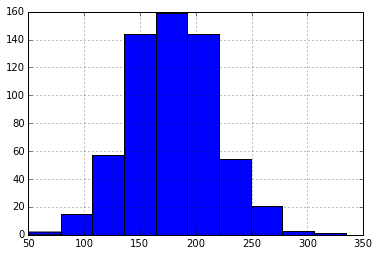

In [13]:
np.random.seed(42)
data = pd.Series(np.random.normal(loc=180, scale=40, size=600))
data.hist()
pass

Notice how it's neatly symmetrical, with only one peak in the middle? You may also know this as the "bell curve". However, it's clear that our data is not normally distributed:

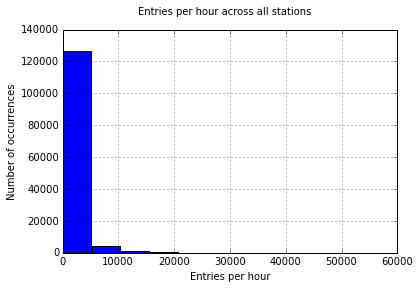

In [14]:
d = data2["ENTRIESn_hourly"].hist()
pylab.suptitle("Entries per hour across all stations")
pylab.xlabel("Entries per hour")
pylab.ylabel("Number of occurrences")
pass

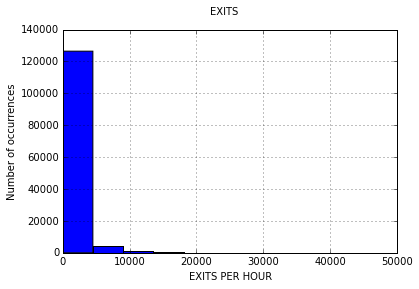

In [17]:
d1 = data2["EXITSn_hourly"].hist()
pylab.suptitle("EXITS")
pylab.xlabel("EXITS PER HOUR")
pylab.ylabel("Number of occurrences")
pass

In [18]:
###CONCLUSIONS

# It was fun working on this project .By using material learned in 608 I was able to visualize data and make some inferences
#I had issues cleaning the data and it consumed most of my time and I had a good understanting on the phrase
#"data scientist spend most of their time preparing and cleaning the data"
#I was able to use python and R in this project and the material learn in class allowed to present this project

In [ ]:
# for more current data  visit http://web.mta.info/developers/data/nyct/turnstile/turnstile_150124.txt